In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [9]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [15]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                             layers.Dense(7*7*64, activation='relu'),
                             layers.Reshape((7,7,64)),
                             layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')])

autoencoder = models.Sequential([encoder,decoder])

# autoencoder.build(input_shape=(None, 28, 28, 1))


In [16]:
# autoencoder.summary()
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                200768    
                                                                 
Total params: 219584 (857.75 KB)
Trainable params: 219584 (857.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_15 (Conv2  (None, 14, 14, 64)        36928     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_16 (Conv2  (None, 28, 28, 32)        18464     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_17 (Conv2  (None, 28, 28, 1)         289       
 DTranspose)                                                     
                                                     

In [18]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10


2025-07-20 20:46:58.041825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 8s 12ms/step - loss: 0.1680 - val_loss: 0.0956
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0895 - val_loss: 0.0834
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0825 - val_loss: 0.0799
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0796 - val_loss: 0.0775
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0780 - val_loss: 0.0765
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0770 - val_loss: 0.0774
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0764 - val_loss: 0.0754
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0758 - val_loss: 0.0748
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0756 - val_loss: 0.0750
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0754 - val_loss: 0.0745


313/313 [==============================] - 1s 4ms/step


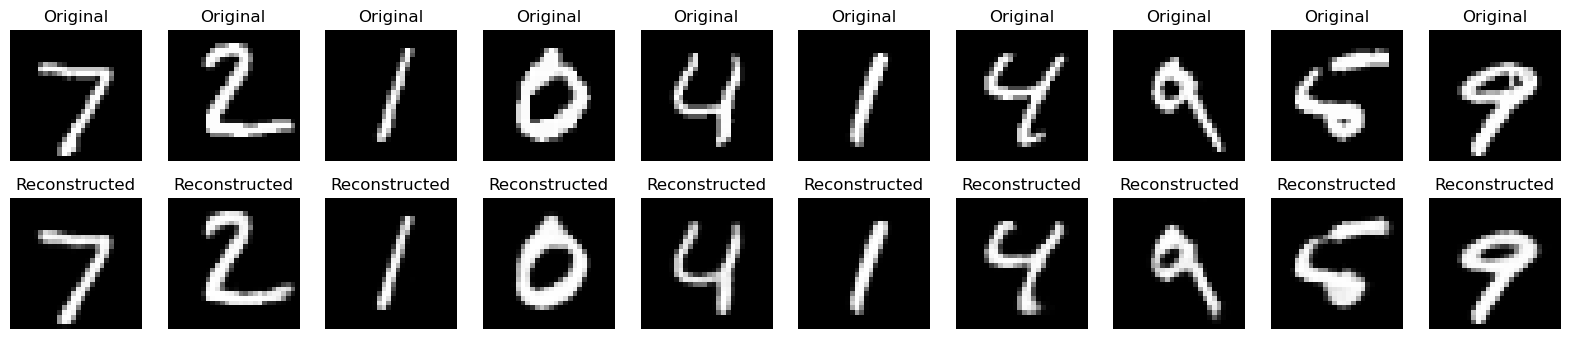

In [20]:
decoded_images = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')

plt.show()

In [21]:
autoencoder.save('autoencoder_mnist.keras')